# Perceptron Multicapa Multivariado en el Tiempo
## Caso de Estudio: Serie de entradas múltiples 
### MLP MULTIVARIATE TIME SERIES FORECASTING - Multiple Input Series

In [3]:
# multivariate mlp example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from pandas import DataFrame, concat, read_csv
""" 
Input:
    figx = Pixeles x
    figy= Pixeles y
    historyXYZ = history del modelo a graficar
    strEvaluacion= tipo de grafica, para definir titulo, subitutlos, etc
    mostrar= booleano para graficar o no
    nombreArchivo=archivo con el cual se guardara el grafico
Output:
    None, muestra la grafica en Matplotlib
Grafica los datos de history de un modelo, ya sea el accucary test vs train o el loss. 
"""
def graficaUnitaria(fix:16,fiy:8,historyXYZ,strEvaluacion,mostrar,nombreArchivo):
    figure(figsize=(fix,fiy))
    pyplot.grid(True)
    if(strEvaluacion=='accuracy'):
        pyplot.title("ACCURACY vs VAL_ACCURACY")
        pyplot.plot(historyXYZ.history['acc'], label='Train ACC')
        pyplot.legend()
        pyplot.plot(historyXYZ.history['val_acc'], label='Test VAL_aCC')
        pyplot.legend()
        #pyplot.savefig(nombreArchivo, dpi=300)
        if(mostrar):
            pyplot.show()
    else:
        pyplot.title("LOSS vs VAL_LOSS")
        pyplot.plot(historyXYZ.history['loss'], label='Train LOSS')
        pyplot.plot(historyXYZ.history['val_loss'], label='Test VAL_LOSS')
        pyplot.legend()
        #pyplot.savefig(nombreArchivo, dpi=300)
        if(mostrar):
            pyplot.show()
            
""" 
Input:
    [10,20,30,40,50...]
Output:
    [[10 15]
     [20 25]
     [30 35]] 65
    [[20 25]
     [30 35]
     [40 45]] 85
    [[30 35]
     [40 45]
     [50 55]] 105
Divide una secuencia multivariada dada en varias muestras donde cada muestra 
tiene un número específico de pasos de tiempo y la salida es un solo paso de tiempo
"""
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
"""
Input: 
    listoflist=Lista de Listas  
    valoresPredecir=Lista vacia en la cual se guardara los valores
Output: 
    valoresPredecir=Lista con los valores almacenados
Pasa de un lista de listas a solo una lista
"""
def reemovNestings(valoresPredecir,listoflist): 
    for i in listoflist: 
        if type(i) == list: 
            reemovNestings(i) 
        else: 
            valoresPredecir.append(i) 
    return valoresPredecir


In [27]:
dataset1 = read_csv('aucorpTrain.csv', header=0, index_col=0)
#print(dataset1)
dato1=dataset1.iloc[:,2]
values1 = dato1.values
val1=values1.tolist()
valores1 = [] 
listVal1=reemovNestings(valores1,val1) 
#print ('The list after removing nesting: ', listVal1) 

dato2=dataset1.iloc[:,3]
values2 = dato2.values
val2=values2.tolist()
valores2 = [] 
listVal2=reemovNestings(valores2,val2) 
#print ('The list after removing nesting: ', listVal2) 

dato3=dataset1.iloc[:,4]
values3 = dato3.values
val3=values3.tolist()
valores3 = [] 
listVal3=reemovNestings(valores3,val3) 
#print ('The list after removing nesting: ', listVal3) 

dato4=dataset1.iloc[:,5]
values4 = dato4.values
val4=values4.tolist()
valores4 = [] 
listVal4=reemovNestings(valores4,val4) 
#print ('The list after removing nesting: ', listVal4) 

dato5=dataset1.iloc[:,6]
values5 = dato5.values
val5=values5.tolist()
valores5 = [] 
listVal5=reemovNestings(valores5,val5) 
#print ('The list after removing nesting: ', listVal5) 

dato6=dataset1.iloc[:,7]
values6 = dato6.values
val6=values6.tolist()
valores6 = [] 
listVal6=reemovNestings(valores6,val6) 
#print ('The list after removing nesting: ', listVal6) 

dato7=dataset1.iloc[:,8]
values7 = dato7.values
val7=values7.tolist()
valores7 = [] 
listVal7=reemovNestings(valores7,val7) 
#print ('The list after removing nesting: ', listVal7) 

dato8=dataset1.iloc[:,9]
values8 = dato8.values
val8=values8.tolist()
valores8 = [] 
listVal8=reemovNestings(valores8,val8) 
#print ('The list after removing nesting: ', listVal8) 

dato9=dataset1.iloc[:,10]
values9 = dato9.values
val9=values9.tolist()
valores9 = [] 
listVal9=reemovNestings(valores9,val9) 
#print ('The list after removing nesting: ', listVal9) 

dato10=dataset1.iloc[:,11]
values10 = dato10.values
val10=values10.tolist()
valores10 = [] 
listVal10=reemovNestings(valores10,val10) 
#print ('The list after removing nesting: ', listVal10) 

dato11=dataset1.iloc[:,12]
values11 = dato11.values
val11=values11.tolist()
valores11 = [] 
listVal11=reemovNestings(valores11,val11) 
#print ('The list after removing nesting: ', listVal11) 

dato12=dataset1.iloc[:,13]
values12 = dato12.values
val12=values12.tolist()
valores12 = [] 
listVal12=reemovNestings(valores12,val12) 
#print ('The list after removing nesting: ', listVal12) 

datoSalida=dataset1.iloc[:,1]
valuesSalida = datoSalida.values
valSalida=valuesSalida.tolist()
valoresSalida = [] 
salida=reemovNestings(valoresSalida,valSalida) 
#print ('The list after removing nesting: ', salida) 


In [28]:
in_seq1 = array(listVal12)
in_seq2 = array(listVal2)
in_seq3 = array(listVal3)
in_seq4 = array(listVal4)
in_seq5 = array(listVal5)
in_seq6 = array(listVal6)
in_seq7 = array(listVal7)
in_seq8 = array(listVal8)
in_seq9 = array(listVal9)
in_seq10 = array(listVal10)
in_seq11 = array(listVal11)
in_seq12 = array(listVal12)
out_seq = array(salida)

in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
in_seq4 = in_seq4.reshape((len(in_seq4), 1))
in_seq5 = in_seq5.reshape((len(in_seq5), 1))
in_seq6 = in_seq6.reshape((len(in_seq6), 1))
in_seq7 = in_seq7.reshape((len(in_seq7), 1))
in_seq8 = in_seq8.reshape((len(in_seq8), 1))
in_seq9 = in_seq9.reshape((len(in_seq9), 1))
in_seq10 = in_seq10.reshape((len(in_seq10), 1))
in_seq11 = in_seq11.reshape((len(in_seq11), 1))
in_seq12 = in_seq12.reshape((len(in_seq12), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

dataset = hstack((in_seq1, in_seq2,in_seq3,in_seq4,in_seq5, in_seq6,in_seq7,in_seq8,in_seq9, in_seq10,in_seq11,in_seq12, out_seq))
n_steps = 3
X, y = split_sequences(dataset, n_steps)



n_input = X.shape[1] * X.shape[2]
#print(X)
X = X.reshape((X.shape[0], n_input))
#print(X.shape[0])

In [29]:
# define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_input))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
# fit model
historyC1=model.fit(X, y, epochs=2000, verbose=0,validation_split=0.33,nb_epoch=200, batch_size=5)
model.summary()
model.save("modeloMultivariadoSEP1001.h5")
print("Modelo Guardado Exitosamente")
# demonstrate prediction
"""
x_input = array([[80, 85,85,85], [90, 95,95,85], [100, 105, 105,85]])
x_input = x_input.reshape((1, n_input))
yhat = model.predict(x_input, verbose=0)
print(yhat)
"""

C:\Users\Usuario\Anaconda3\envs\prediccionventas\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               3700      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 3,801
Trainable params: 3,801
Non-trainable params: 0
_________________________________________________________________


'\n\nx_input = array([[80, 85,85,85], [90, 95,95,85], [100, 105, 105,85]])\nx_input = x_input.reshape((1, n_input))\nyhat = model.predict(x_input, verbose=0)\nprint(yhat)\n'

Populating the interactive namespace from numpy and matplotlib


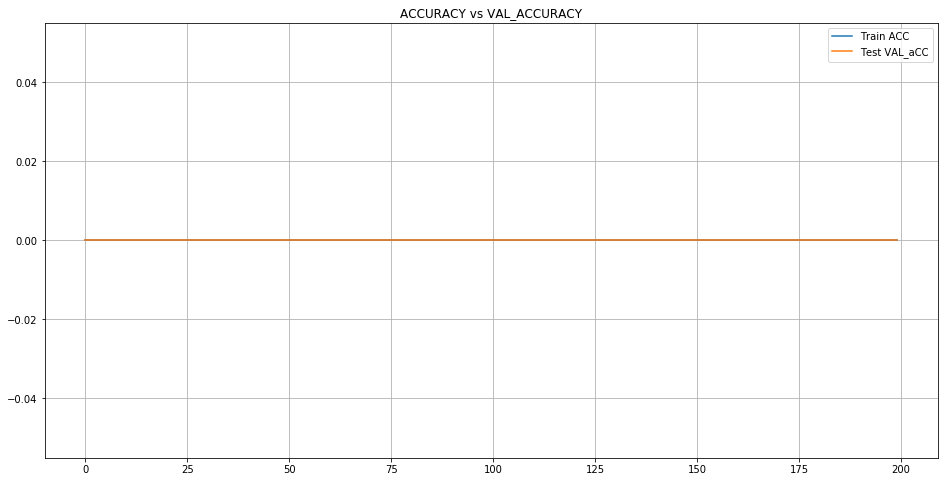

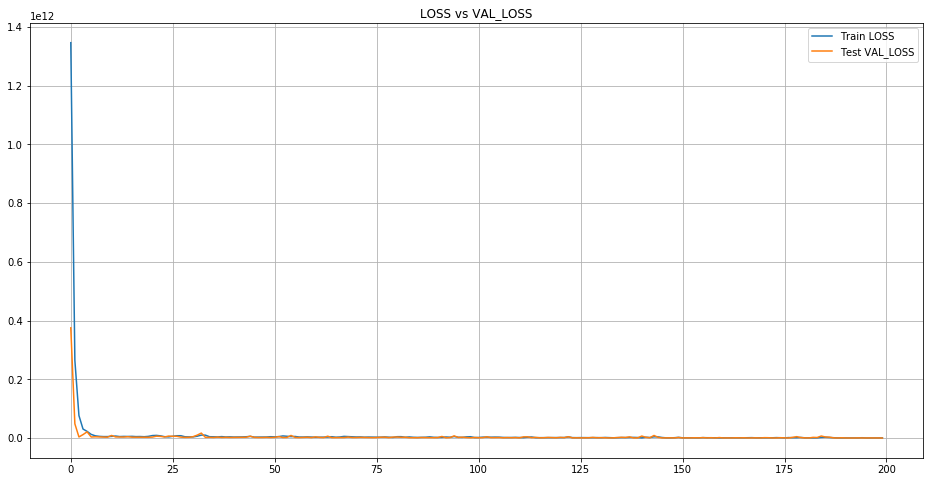

In [30]:
%pylab inline
graficaUnitaria(16,8,historyC1,'accuracy',True,'c1Acc.png')
graficaUnitaria(16,8,historyC1,'loss',True,'c1Loss.png')